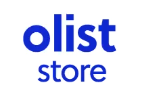

<h1><center> NOTEBOOK D'EXPLORATION

# Sommaire <a id="0"></a>



I.  [Importation des bibliothèques et données](#1)<br>

II.  [Nettoyage](#2)<br>
- II.1  [Vue d'ensemble des fichers](#2.1)<br>
- II.2  [Supressions des colonnes non utiles pour l'analyse](#2.2)<br>
- II.3  [Correction des formats](#2.3)<br>


III.  [Réconciliation des tables](#3) <br>
- III.1  [Identification des écarts](#3.1) <br>
- III.2  [Analyse des écarts](#3.2) <br>

IV. [Création des variables et du dataframe par clients ](#4)<br>
 -   IV.1 [Variables relatives aux commandes des clients ](#4.1)<br>
 -   IV.2 [Variables relatives à la localisation des clients ](#4.2)<br>
 -   IV.3 [Variables relatives à la satisfaction clients ](#4.3)<br>
 -   IV.4 [création du dataframe par clients ](#4.4)<br>
 
V. [Analyse exploratoire  ](#5)<br>
- V.1 [Analyse descriptives  ](#5.1)<br>
- V.2 [Analyse des corrélations ](#5.2)<br>


## I. IMPORTATION DES BIBLIOTHEQUES ET FICHIERS <a id="1"></a>

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import plotly.express as px


In [2]:
#import files

customers=pd.read_csv('olist_customers_dataset.csv')
geolocation=pd.read_csv("olist_geolocation_dataset.csv")
order_items=pd.read_csv("olist_order_items_dataset.csv")
order_payments=pd.read_csv("olist_order_payments_dataset.csv")
order_reviews=pd.read_csv("olist_order_reviews_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products=pd.read_csv("olist_products_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")
product_cat=pd.read_csv("product_category_name_translation.csv")

In [3]:
#attribution de noms aux dataframes
for file, nom in zip([customers, geolocation, order_items, order_payments, 
                 order_reviews, orders, products, sellers, product_cat],
                     ["Customers", "Geolocation", "Order_items", "Order_payments", 
                "Order_reviews", "Orders", "Products", "Sellers", "product_cat"]
                    ):
    
    file.name=nom

# II. NETTOYAGE  <a id="2"></a>

# II.1 Vue d'ensemble des fichers <a id="2.1"></a>

In [4]:
for file in [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers, product_cat]:
    print('\n table : ',file.name.upper(), '\n')
    display(file.info())
    display(file.head())
    display(file.describe(include='all')[:2])
    


 table :  CUSTOMERS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.0,99441,99441
unique,99441,96096,NaN,4119,27



 table :  GEOLOCATION 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1000163.0,1000163.0,1000163.0,1000163,1000163
unique,NaN,NaN,NaN,8011,27



 table :  ORDER_ITEMS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.0,112650,112650,112650,112650.0,112650.0
unique,98666,NaN,32951,3095,93318,NaN,NaN



 table :  ORDER_PAYMENTS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.0,103886,103886.0,103886.0
unique,99440,NaN,5,NaN,NaN



 table :  ORDER_REVIEWS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.0,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248



 table :  ORDERS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459



 table :  PRODUCTS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.0,32341.0,32341.0,32949.0,32949.0,32949.0,32949.0
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 table :  SELLERS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.0,3095,3095
unique,3095,NaN,611,23



 table :  PRODUCT_CAT 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


None

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


,product_category_name,product_category_name_english
count,71,71
unique,71,71


# II.2 Supressions des colonnes non utiles pour l'analyse <a id="2.2"></a>

In [5]:
order_items_coldrop=['shipping_limit_date']

order_reviews_coldrop=['review_comment_title']

orders_coldrop=[
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date', 
        'order_estimated_delivery_date'
        ]

products_coldrop=[
        'product_name_lenght',
        'product_description_lenght',  
        'product_photos_qty',          
        'product_weight_g',            
        'product_length_cm',           
        'product_height_cm',           
        'product_width_cm'
        ]

In [6]:
for file, cols in zip(
        [order_items, order_reviews, orders, products],
        [order_items_coldrop, order_reviews_coldrop, orders_coldrop, products_coldrop]
                    ):
    file.drop(columns=cols, inplace=True)

# II.3 Correction des formats <a id="2.3"></a>

Convertissons les dates au format datetime

In [7]:
orders.loc[:,"order_purchase_timestamp"]=pd.to_datetime(orders["order_purchase_timestamp"])
order_reviews.loc[:,'review_creation_date']=pd.to_datetime(order_reviews["review_creation_date"])
order_reviews.loc[:,'review_answer_timestamp']=pd.to_datetime(order_reviews['review_answer_timestamp'])               

Convertissons codes postaux au format objet

In [8]:
geolocation["geolocation_zip_code_prefix"]=geolocation["geolocation_zip_code_prefix"].astype('object')
customers["customer_zip_code_prefix"]=customers["customer_zip_code_prefix"].astype('object')
sellers["seller_zip_code_prefix"]=sellers["seller_zip_code_prefix"].astype('object')

Dans le fichier product, il y a des produits pour lesquels la catégorie est inconnue et apparait en valeur Nan, remplaçons par 'unknown'.

In [9]:
products.fillna('unknown', inplace=True)

[Retour au sommaire](#0)<br>

# III RECONCILIATION DES TABLES  <a id="3"></a>

# III.1 Identification des écarts <a id="3.1"></a>

Définition d'une fonction permettant d'identifier les écarts entre les tables

In [10]:
def check_difference(A,B, column):
    ''' takes in argument two dataframes and one common column name
    check their differences and print the number of differences and a sample of 10 differences'''
    for (serie_1, serie_2), (name_1,name_2) in zip([(A[column],B[column]), (B[column],A[column])],
                                                   [(A.name,B.name),(B.name, A.name)]):
        difference = set(serie_1) - set(serie_2)
        print(f'Nbre valeurs dans {name_1} pas dans {name_2} : {len(difference)}')
        

## a) customer_id

In [11]:
check_difference(customers,orders,'customer_id')

Nbre valeurs dans Customers pas dans Orders : 0
Nbre valeurs dans Orders pas dans Customers : 0


## b)order_id

In [12]:
check_difference(orders,order_items,'order_id')

Nbre valeurs dans Orders pas dans Order_items : 775
Nbre valeurs dans Order_items pas dans Orders : 0


In [13]:
check_difference(orders,order_payments,'order_id')

Nbre valeurs dans Orders pas dans Order_payments : 1
Nbre valeurs dans Order_payments pas dans Orders : 0


In [14]:
check_difference(orders,order_reviews,'order_id')

Nbre valeurs dans Orders pas dans Order_reviews : 768
Nbre valeurs dans Order_reviews pas dans Orders : 0


## c)product_id

In [15]:
check_difference(products,order_items,'product_id')

Nbre valeurs dans Products pas dans Order_items : 0
Nbre valeurs dans Order_items pas dans Products : 0


## d) seller_id

In [16]:
check_difference(sellers,order_items,'seller_id')

Nbre valeurs dans Sellers pas dans Order_items : 0
Nbre valeurs dans Order_items pas dans Sellers : 0


## e) product_category_name

In [17]:
check_difference(products,product_cat,'product_category_name')

Nbre valeurs dans Products pas dans product_cat : 3
Nbre valeurs dans product_cat pas dans Products : 0


# III.2 Analyse et des écarts <a id="3.2"></a>



## a) order_id

Afin d'analyser les écarts sur les commandes intégrons les montants des commandes et des paiements dans la table orders.

In [18]:
#calcul des paiements par commandes
payments=order_payments[['order_id','payment_value']].groupby('order_id').sum().reset_index()

In [19]:
#calcul du total des commandes
price=order_items.groupby('order_id').sum().drop(columns='order_item_id').reset_index()
price['total_order']=price['price']+price['freight_value']

In [20]:
#fusion des fichiers
orders=orders.merge(price[['order_id','total_order']], how='left',on='order_id').merge(payments, how='left',on='order_id')

In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   total_order               98666 non-null  float64       
 5   payment_value             99440 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 5.3+ MB


Il y a plus de commandes dans le fichier order_payments que dans le fichier order_items, analysons cet écart en terme de valeur.

In [22]:
orders[['total_order','payment_value']].sum()

total_order      15843553.24
payment_value    16008872.12
dtype: float64

In [23]:
orders[['total_order','payment_value']].sum().diff()

total_order            NaN
payment_value    165318.88
dtype: float64

Il y a 165 319 BRS de commandes dans le fichier order_payments qui n'ont pas de correspondance de le fichier order_items

Vérifions la part de cette écart qui est attribuable aux 775 commandes du fichier orders qui ne sont pas dans le fichier order_items

In [24]:
orders.loc[orders['total_order'].isnull(),['total_order','payment_value']].sum()

total_order           0.00
payment_value    162591.95
dtype: float64

In [25]:
orders.loc[orders['total_order'].notnull(),['total_order','payment_value']].sum().diff()

total_order          NaN
payment_value    2726.93
dtype: float64

Regardons le statut des 775 commandes en écart

In [26]:
orders.loc[orders['total_order'].isnull(),'order_status'].value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

In [27]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Il y a envirron 1% des commandes (en valeur) qui apparaissent dans le fichier payment_orders mais qui ne sont pas dans les commandes détaillées.
La majorité de ces commandes sont en statut 'unavailable' ou cancelled.

## b) product_category_name
Il y a 3 catégorie de produits en plus dans le fichier product.

Intégrons fusionnons les tables products et product_cat

In [28]:
#fusion des fichiers
products=products.merge(product_cat, how='left',on='product_category_name')

In [29]:
#produits non traduits
products.loc[products['product_category_name_english'].isna(),'product_category_name'].value_counts()

unknown                                          610
portateis_cozinha_e_preparadores_de_alimentos     10
pc_gamer                                           3
Name: product_category_name, dtype: int64

In [30]:
english_missing=products.loc[products['product_category_name_english'].isna(),'product_category_name'].copy()
products.loc[products['product_category_name_english'].isna(),'product_category_name_english']=english_missing

In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32951 non-null  object
 2   product_category_name_english  32951 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


[Retour au sommaire](#0)<br>

# IV CREATION DES VARIABLES ET DU DATAFRAME PAR CLIENTS  <a id="4"></a>

# IV.1  Variables relatives aux commandes des clients  <a id="4.1"></a>

## fusion des tables et calculs de variables par commandes

Intégration des catégories de produits dans order_items

In [32]:
items_products=order_items.merge(products, on='product_id')

In [33]:
items_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   price                          112650 non-null  float64
 5   freight_value                  112650 non-null  float64
 6   product_category_name          112650 non-null  object 
 7   product_category_name_english  112650 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.7+ MB


Intégration des clients dans orders

In [34]:
orders_cust=orders.merge(customers, on='customer_id')

In [35]:
orders_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
 4   total_order               98666 non-null  float64       
 5   payment_value             99440 non-null  float64       
 6   customer_unique_id        99441 non-null  object        
 7   customer_zip_code_prefix  99441 non-null  object        
 8   customer_city             99441 non-null  object        
 9   customer_state            99441 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 8.3+ MB


Calcul du nombre d'article par commande

In [36]:
items_per_order=items_products.groupby('order_id')[['product_id']].count().reset_index()

In [37]:
items_per_order.columns=['order_id','items_per_order']

Calcul du nombre d'articles différents, nombre de vendeurs différents et nombre catégories différentes par commandes

In [38]:
uniques=items_products[['order_id','seller_id','product_id','product_category_name']].groupby('order_id').nunique().reset_index()

In [39]:
uniques.columns=['order_id','sellers_per_order','unique_products_per_order','unique_category_names_per_order']

Intégration dans orders_cust

In [40]:
orders_cust=orders_cust.merge(items_per_order, how='left',on='order_id').merge(uniques,how='left', on='order_id')

In [41]:
orders_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   order_id                         99441 non-null  object        
 1   customer_id                      99441 non-null  object        
 2   order_status                     99441 non-null  object        
 3   order_purchase_timestamp         99441 non-null  datetime64[ns]
 4   total_order                      98666 non-null  float64       
 5   payment_value                    99440 non-null  float64       
 6   customer_unique_id               99441 non-null  object        
 7   customer_zip_code_prefix         99441 non-null  object        
 8   customer_city                    99441 non-null  object        
 9   customer_state                   99441 non-null  object        
 10  items_per_order                  98666 non-null  float64  

## Traitement des valeurs nulles

Remplaçons les montants total_order nuls par le montant 'payment value'

In [42]:
total_nan=orders_cust.loc[orders_cust['total_order'].isnull(), 'payment_value'].copy()
orders_cust.loc[orders_cust['total_order'].isnull(), 'total_order']=total_nan

## Calcul des variables par clients

In [43]:
#groupby object
cust_groupby=orders_cust.groupby('customer_unique_id')

In [44]:
#nombre de commande par clients
number_of_orders=cust_groupby[['order_id']].count()
number_of_orders.columns=['nb_orders']

In [45]:
#date du dernier achat
last_order=cust_groupby[['order_purchase_timestamp']].max()
last_order.columns=['last_order_timestamp']

In [46]:
#date du premier achat
first_order=cust_groupby[['order_purchase_timestamp']].min()
first_order.columns=['first_order_timestamp']

In [47]:
#caractéristiques du panier moyen 
basket=cust_groupby[['total_order','items_per_order','sellers_per_order','unique_products_per_order','unique_category_names_per_order']].mean()
basket.columns=['mean_spent_per_order','mean_items_per_order','mean_sellers_per_order','mean_unique_products_per_order','mean_unique_cat_per_order']

[Retour au sommaire](#0)<br>

# IV.2  Variables relatives à la localisation des clients  <a id="4.2"></a>

Analysons la répartition des clients par villes et par Etats afin de choisir une variable pertinente

In [48]:
#nombre de villes dans le jeu de données
len(orders_cust['customer_city'].unique())

4119

In [49]:
orders_cust['customer_city'].value_counts().head(10)

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [50]:
#nombre d'états dans le jeu de données
len(orders_cust['customer_state'].unique())

27

In [51]:
orders_cust['customer_state'].value_counts().head(10)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_state, dtype: int64

Nous allons utiliser la localisation des clients par Etats et conserver uniquements les trois principaux états

In [52]:
other_states=set(orders_cust['customer_state'].unique())-{'SP','RJ', 'MG'}

In [53]:
orders_cust[['customer_unique_id','customer_state']].copy().drop_duplicates()

,customer_unique_id,customer_state
0,7c396fd4830fd04220f754e42b4e5bff,SP
1,af07308b275d755c9edb36a90c618231,BA
2,3a653a41f6f9fc3d2a113cf8398680e8,GO
3,7c142cf63193a1473d2e66489a9ae977,RN
4,72632f0f9dd73dfee390c9b22eb56dd6,SP
...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,SP
99437,da62f9e57a76d978d02ab5362c509660,SP
99438,737520a9aad80b3fbbdad19b66b37b30,BA
99439,5097a5312c8b157bb7be58ae360ef43c,RJ


Certains clients sont identifiés sur plusieurs états différents (environ 130), ce n'est pas significatifs alors nous allons utiliser l'état le plus fréquent.

In [54]:
cust_states=cust_groupby[['customer_state']].max()

In [55]:
cust_states.loc[cust_states['customer_state'].isin(other_states),'customer_state']='Other'

[Retour au sommaire](#0)<br>

# IV.3 Variables relatives à la satisfaction clients <a id="4.3"></a>

In [56]:
reviews=orders_cust[['order_id','customer_unique_id']].merge(order_reviews, how='left', on='order_id')

In [57]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99992 non-null  object        
 1   customer_unique_id       99992 non-null  object        
 2   review_id                99224 non-null  object        
 3   review_score             99224 non-null  float64       
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 6.1+ MB


In [58]:
#groupby object
reviews_grouby=reviews.groupby('customer_unique_id')

In [59]:
#nombre de revues laissées, nombre de commentaires
review_num=reviews_grouby[['review_comment_message','review_id']].count()
review_num.columns=['num_review_comments', 'num_reviews']

In [60]:
#note moyenne 
score=reviews_grouby[['review_score']].mean()
score.columns=['mean_score']

[Retour au sommaire](#0)<br>

# IV.4 Création du dataframe clients <a id="4.4"></a>

In [61]:
clients=number_of_orders
for df in [last_order,first_order,basket,review_num,score, cust_states]:
    clients=clients.merge(df, on='customer_unique_id')

In [62]:
clients=clients.reset_index()

In [63]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_unique_id              96096 non-null  object        
 1   nb_orders                       96096 non-null  int64         
 2   last_order_timestamp            96096 non-null  datetime64[ns]
 3   first_order_timestamp           96096 non-null  datetime64[ns]
 4   mean_spent_per_order            96096 non-null  float64       
 5   mean_items_per_order            95420 non-null  float64       
 6   mean_sellers_per_order          95420 non-null  float64       
 7   mean_unique_products_per_order  95420 non-null  float64       
 8   mean_unique_cat_per_order       95420 non-null  float64       
 9   num_review_comments             96096 non-null  int64         
 10  num_reviews                     96096 non-null  int64         
 11  me

## analyse des valeur nulles

In [64]:
clients.loc[clients['mean_items_per_order'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 123 to 95988
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_unique_id              676 non-null    object        
 1   nb_orders                       676 non-null    int64         
 2   last_order_timestamp            676 non-null    datetime64[ns]
 3   first_order_timestamp           676 non-null    datetime64[ns]
 4   mean_spent_per_order            676 non-null    float64       
 5   mean_items_per_order            0 non-null      float64       
 6   mean_sellers_per_order          0 non-null      float64       
 7   mean_unique_products_per_order  0 non-null      float64       
 8   mean_unique_cat_per_order       0 non-null      float64       
 9   num_review_comments             676 non-null    int64         
 10  num_reviews                     676 non-null    int64         
 11  me

In [65]:
clients.loc[clients['mean_items_per_order'].isna(), 'mean_score'].describe()

count    659.000000
mean       1.614568
std        1.216715
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: mean_score, dtype: float64

In [66]:
clients['mean_score'].describe()

count    95380.000000
mean         4.084989
std          1.341571
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: mean_score, dtype: float64

Il y a 676 clients pour lesquelles aucune de leur commande ne contient de détail produits. Ces clients laissent cependant des revues donc nous allons garder ces clients dans la base.

pour ces 676 clients nous allons remplacer les valeurs nulles par :
- le score moyen de ces clients pour la variable mean_score
- 0 pour les autre variables.

pour les autres 95420 clients qui n'ont pas laissé de score nous allons remplacer les valeurs nulles par le score moyen de ces clients.


In [67]:
moy_na=clients.loc[clients['mean_items_per_order'].isna(), 'mean_score'].mean()

In [68]:
moy_notna=clients.loc[clients['mean_items_per_order'].notna(), 'mean_score'].mean()

In [69]:
clients.loc[(clients['mean_items_per_order'].isna() & clients['mean_score'].isna()), 'mean_score']=moy_na

In [70]:
clients.loc[(clients['mean_items_per_order'].notna() & clients['mean_score'].isna()), 'mean_score']=moy_notna

In [71]:
clients.fillna(0, inplace=True)

remplaçons les variables 'last_order_timestamp' et 'first_order_timestamp' par les variables :

- 'recency' qui mesure le nombre de jours depuis le dernier achat
- 'age' qui mesure l'ancienneté du client

créons une variable year qui va nous servir pour évaluer la fréquence de mise à jour.

In [72]:
clients['recency']=(pd.to_datetime('now')-clients['last_order_timestamp']).dt.days

In [73]:
clients['age']=(pd.to_datetime('now')-clients['first_order_timestamp']).dt.days

In [74]:
clients['year']=clients['first_order_timestamp'].dt.year.astype('object')

In [75]:
clients.drop(columns=['last_order_timestamp','first_order_timestamp'], inplace=True)

In [76]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_unique_id              96096 non-null  object 
 1   nb_orders                       96096 non-null  int64  
 2   mean_spent_per_order            96096 non-null  float64
 3   mean_items_per_order            96096 non-null  float64
 4   mean_sellers_per_order          96096 non-null  float64
 5   mean_unique_products_per_order  96096 non-null  float64
 6   mean_unique_cat_per_order       96096 non-null  float64
 7   num_review_comments             96096 non-null  int64  
 8   num_reviews                     96096 non-null  int64  
 9   mean_score                      96096 non-null  float64
 10  customer_state                  96096 non-null  object 
 11  recency                         96096 non-null  int64  
 12  age                             

[Retour au sommaire](#0)<br>

# V ANALYSE EXPLOIRATOIRE  <a id="5"></a>

# Analyse descriptive

In [77]:
clients.describe()

,nb_orders,mean_spent_per_order,mean_items_per_order,mean_sellers_per_order,mean_unique_products_per_order,mean_unique_cat_per_order,num_review_comments,num_reviews,mean_score,recency,age
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,1.034809,161.373125,1.131087,1.006134,1.029632,1.000757,0.426417,1.032551,4.084677,1666.516515,1669.239334
std,0.214384,222.291655,0.533585,0.145799,0.235160,0.122040,0.524380,0.269283,1.336969,153.414688,153.903866
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1378.000000,1378.000000
25%,1.000000,62.440000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,1542.000000,1545.000000
50%,1.000000,105.810000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5.000000,1647.000000,1651.000000
75%,1.000000,177.160000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1776.000000,1779.000000
max,17.000000,13664.080000,21.000000,5.000000,8.000000,3.000000,7.000000,17.000000,5.000000,2151.000000,2151.000000


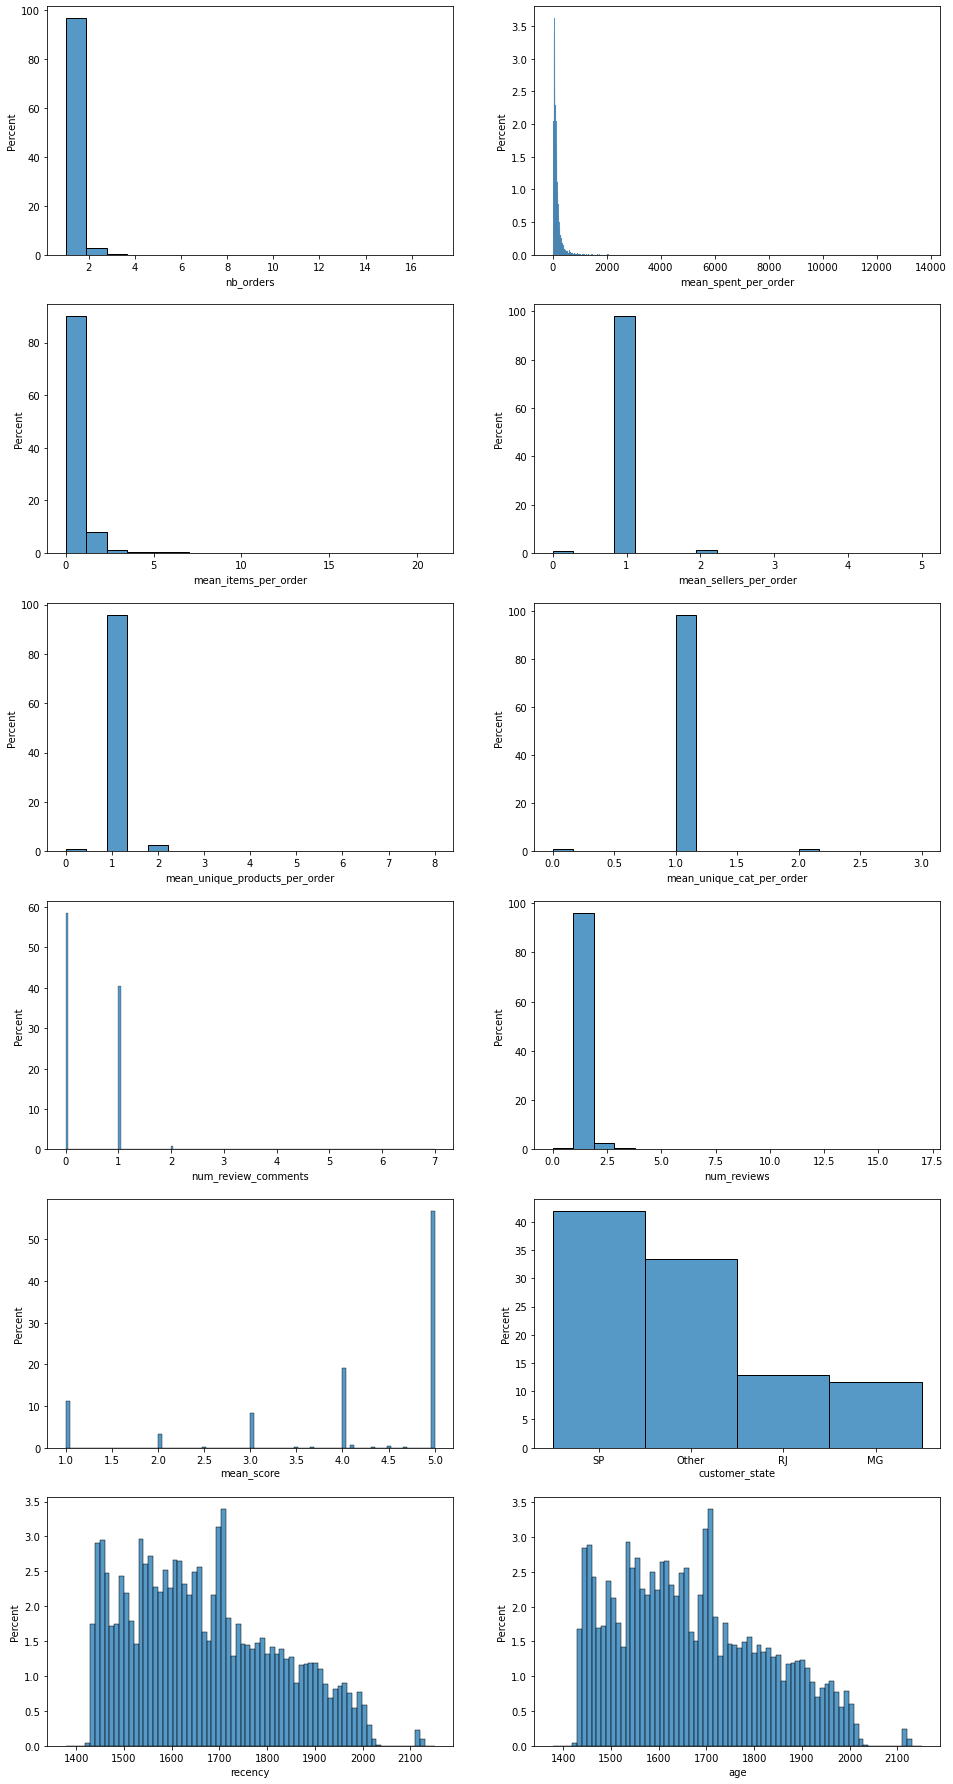

In [78]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6,2, figsize=(16,32))
for ax, col in zip([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12],clients.columns[1:13]):
    sns.histplot(data=clients, x=col, stat='percent', ax=ax)

# Analyse des corrélations

remplaçons la variable customer_state par des dummy variables

In [79]:
dummy_states=pd.get_dummies(clients['customer_state']).copy()
clients=pd.concat([clients,dummy_states], axis=1)

In [1]:
fig, ax1= plt.subplots( figsize=(16,10))
sns.heatmap(clients.corr(), annot=True, cmap="YlGnBu")

NameError: name 'plt' is not defined

# Dataframe final

Nous allons supprimer les variables fortement corrélées à d'autres variables.

Nous n'avons gardé une seule variable de localisation afin de simplifier et stabiliser notre modèle.


In [81]:
clients.drop(columns=['customer_state', 'Other','RJ','MG','num_reviews',
                      'mean_sellers_per_order', 'mean_unique_products_per_order'], inplace=True)

In [82]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_unique_id         96096 non-null  object 
 1   nb_orders                  96096 non-null  int64  
 2   mean_spent_per_order       96096 non-null  float64
 3   mean_items_per_order       96096 non-null  float64
 4   mean_unique_cat_per_order  96096 non-null  float64
 5   num_review_comments        96096 non-null  int64  
 6   mean_score                 96096 non-null  float64
 7   recency                    96096 non-null  int64  
 8   age                        96096 non-null  int64  
 9   year                       96096 non-null  object 
 10  SP                         96096 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(1)
memory usage: 7.4+ MB


In [83]:
#export file
clients.to_csv('clients.csv', index=False)

[Retour au sommaire](#0)<br>